In [1]:
!pip install opencv-python

# 1. Threshold based segmentation

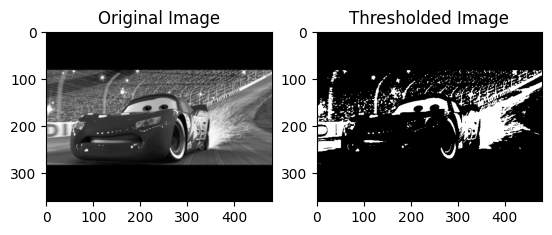

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images
plt.subplot(121), plt.imshow(image, 'gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(binary_image, 'gray'), plt.title('Thresholded Image')
plt.show()


# 2. Region and watershed based segmentation

In [10]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('car.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Perform morphological operations to clean up the image
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Identify sure background area using dilation
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Identify sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Identify unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling for watershed algorithm
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed algorithm
cv2.watershed(image, markers)

# Highlight segmented regions in the original image
image[markers == -1] = [0, 0, 255]  # Mark watershed boundaries in red

cv2.imwrite("output.png",image)

# Display the result
cv2.waitKey(0)
cv2.destroyAllWindows()


# 3. Edge based segmentation

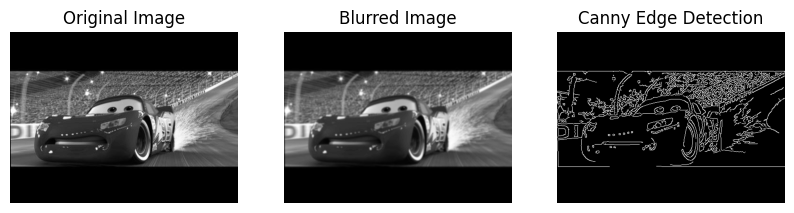

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
image_path = 'car.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to the image to reduce noise and improve edge detection
blurred_image = cv2.GaussianBlur(original_image, (5, 5), 0)

# Apply Canny edge detector
edges = cv2.Canny(blurred_image, 50, 150)  # You can adjust the threshold values

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()


# 4. Cluster based segmentation

In [14]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('car.jpg')

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Convert pixel values to float
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # You can adjust the number of clusters as needed
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit values
centers = np.uint8(centers)

# Map the labels to their corresponding center values
segmented_image = centers[labels.flatten()]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
cv2.imwrite('Segmented Image.png', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
